# Classification Algorithm 

# Support Vector Machines

Import packages and dataset

In [1270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1271]:
# Load the Iris Plant Database
from sklearn import svm, datasets
iris = datasets.load_iris()
# Load the keys
print('Iris Keys')
print(iris.keys())
print('\n')
# Info on the data
print(iris['DESCR'])

Iris Keys
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== 

In [1283]:
# Create a data frame for characteristics/features of the three types of iris
features = pd.DataFrame(iris['data'],columns=iris['feature_names'])
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [1284]:
# Analyze the features dataset
features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [1285]:
# Create a data frame for the iris types data
target = pd.DataFrame(iris['target'],columns=['species'])
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
species    150 non-null int64
dtypes: int64(1)
memory usage: 1.2 KB


In [1286]:
df = pd.concat([features, target], axis=1)

Visualize the Dataset

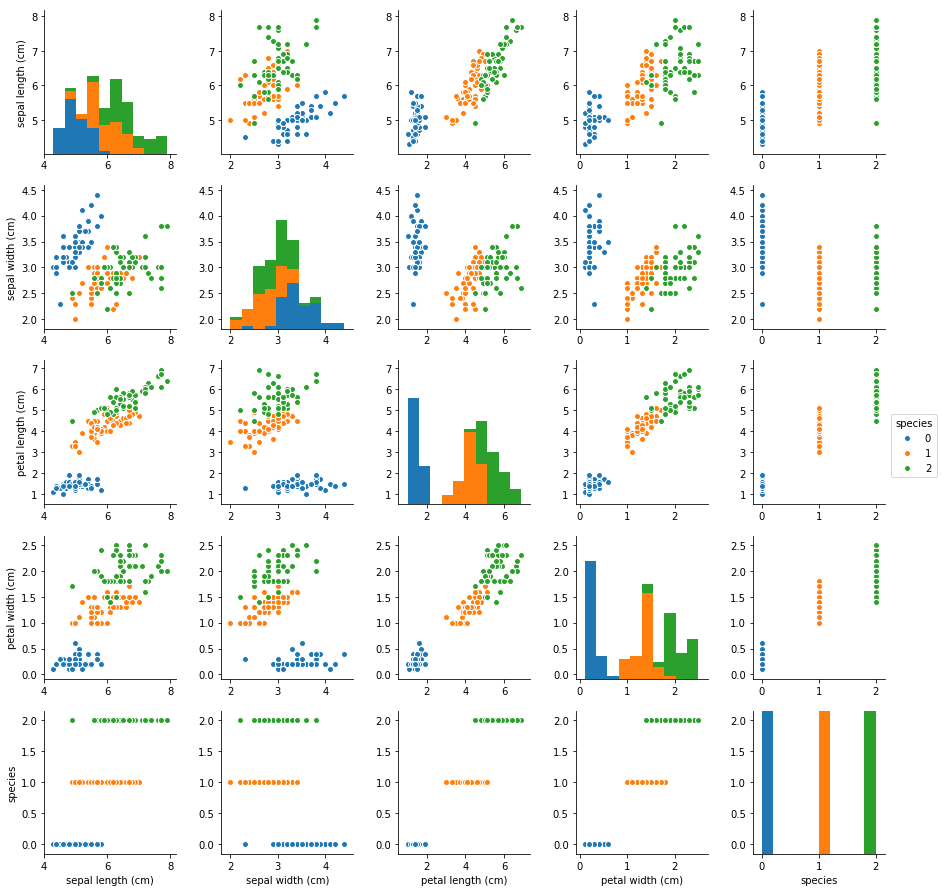

In [1287]:
sns.pairplot(df, hue='species')

Setosa generally has the shortest and widest sepals. It also has the shortest and skinnest petals. Overall, we do see some correleations between the features. Judging by the clusters, the setosa species seems to be quite different from the other two species. 

Train the Model by SVM Algorithm

In [1361]:
from sklearn.cross_validation import train_test_split

In [1362]:
# Train the first 2 features only 
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1352]:
# Set up the meshgrid 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

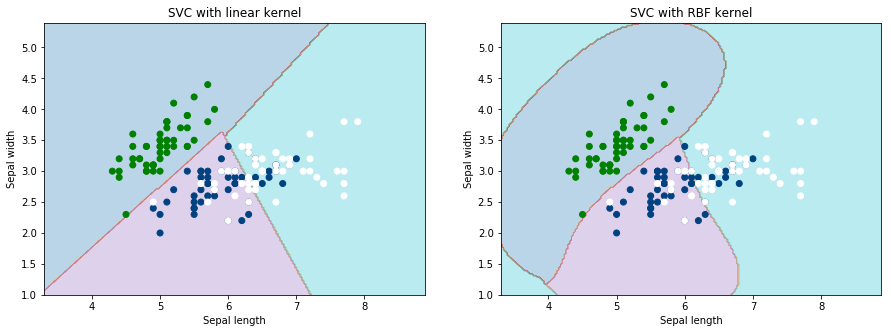

In [1303]:
# Create the SVM with Linear Kernel
svc = svm.SVC(kernel='linear', C=1).fit(X, y)

# Plot the SVM with Linear Kernel
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.ocean)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

# Create the SVM with RBF Kernel
svc = svm.SVC(kernel='rbf', C=1, gamma=1).fit(X, y)

# Plot the SVM with RBF Kernel
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.ocean)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')

plt.show()

On the left, the SVC uses the linear kernel and it results straight line decision boundaries among the three species of iris. Using this linear kernel, we see that the green points land in the light blue region all by themselves. However, the blue and white points are not perfectly classified. With the RBF kernel, the decision boundaries do not have to be straight lines. The green points again are perfectly enclosed, but the blue and white points still are not perfectly classifed. Of course, this requires more tuning in the parameters. 

The Parameters of Radial Basis Function (RBF)

The linear kerneral only requires the C parameter which is the penalty parameter for missclassifying a data point. The RBF requires 2 parameters which are C and gamma. 

The parameter C deals with the tradeoff between misclassification of the training points and smooth decision boundry. A high C aims at classifiying all data correctly while a low c (low bias, high variance) is acceptable to have misclassified data points (high bias, low variance). 

The parameter G defines how far the influence of a single training point reaches. If gamma is high, the decision boundary depends on the points that are very close to it, which effectively ignoring some of points that are far from the decision boundary. If gamma is low, even far away points get taken into account when deciding where to draw the decision boundary. For high gammas, you can end up with islands of decision boundaries. A particular point that is near the boundary will carry a lot of weight. It can pull the decision boundary all the way so it ends up land on the correct side. If gamma is low, points near the boundary and points far away both influence the decision boundary. Thus, when gamma is low, boundary region is very broad. 

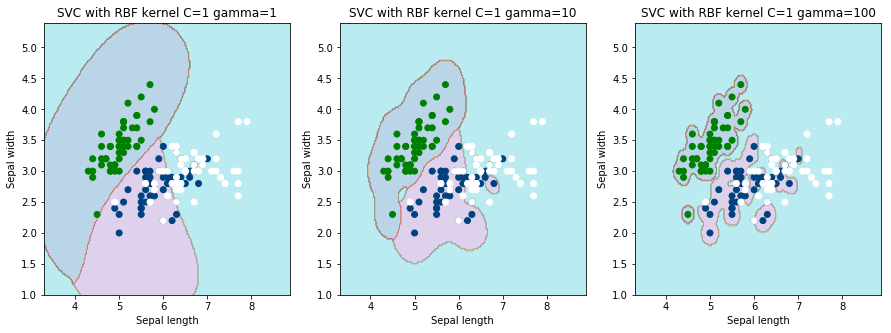

In [1305]:
# Create the SVM with RBF Kernel
# Only consider the changes in Gamma while holding C constant
svc = svm.SVC(kernel='rbf', C=1, gamma=1).fit(X, y)

# Plot the SVM with Linear Kernel
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.ocean)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel C=1 gamma=1')

# Create the SVM with RBF Kernel
svc = svm.SVC(kernel='rbf', C=1, gamma=10).fit(X, y)

# Plot the SVM with RBF Kernel
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.subplot(1, 3, 2)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.ocean)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel C=1 gamma=10')

# Create the SVM with RBF Kernel
svc = svm.SVC(kernel='rbf', C=1, gamma=100).fit(X, y)

# Plot the SVM with RBF Kernel
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.subplot(1, 3, 3)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.ocean)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel C=1 gamma=100')

plt.show()

We can see from above, as gamma increases, the decision boundary becomes more depedent on individual data points, thus, creating islands (i.e. when gamma = 100). Looking at gamma=100, both green and blue points are pulling the boundries to enclose them. Since some blue and green points are off from the majority, islands are created to ensure that these points also have boundries. 

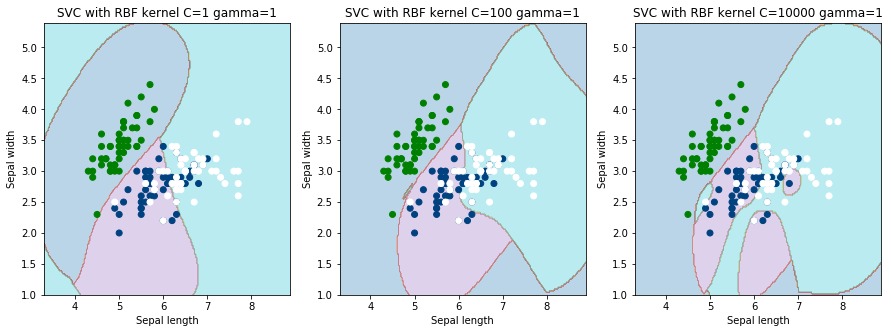

In [1311]:
# Create the SVM with RBF Kernel
# Only consider the changes in C while holding gamma constant
svc = svm.SVC(kernel='rbf', C=1, gamma=1).fit(X, y)

# Plot the SVM with Linear Kernel
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.ocean)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel C=1 gamma=1')

# Create the SVM with RBF Kernel
svc = svm.SVC(kernel='rbf', C=100, gamma=1).fit(X, y)

# Plot the SVM with RBF Kernel
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.subplot(1, 3, 2)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.ocean)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel C=100 gamma=1')

# Create the SVM with RBF Kernel
svc = svm.SVC(kernel='rbf', C=10000, gamma=1).fit(X, y)

# Plot the SVM with RBF Kernel
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.subplot(1, 3, 3)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.ocean)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel C=10000 gamma=1')

plt.show()

The C parameter deals with misclassification. As C increases, misclassification has become more intolerate and this means that the SVC classifer works really hard to ensure the correct classification of the data points. The boundary again becomes more dependent on the data points (i.e. C=10000). 

GridSearchCV and Evaluating the Model

In [1363]:
from sklearn.model_selection import GridSearchCV

In [1364]:
# Set up parameters by 5-fold cross validation
para = [{'kernel': ['rbf'],
               'gamma': [1, 0.1, 0.01, 0.001],
                'C': [0.1, 1, 10, 100]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [1365]:
# 5-fold cross validation to perform grid search to calculate optimal hyper-parameters
clf = GridSearchCV(SVC(), para, verbose=2, cv = 5)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001], 'C': [0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [1366]:
# Print out the best parameters
print(clf.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [1367]:
# Applying the test dataset to the above model
clf_predictions = clf.predict(X_test)

In [1368]:
# Find out the cconfusion matrix and the classification report
from sklearn.metrics import confusion_matrix, classification_report

In [1369]:
print(confusion_matrix(y_test, clf_predictions))

[[17  1  0]
 [ 0 15  2]
 [ 0  2  8]]


Since we have chosen 30% of the data to be our test data, we have 45/150 points in this test dataset. This 45 is derived from adding all the entries from the above confusion matrix. The diagnoal of the table contains all the correct predictions. To test for overall classification, we use the following:

Accuracy = (True Positive + True Negative)/Total or (Add up the Diagnoal Entries)/Total 

In our case, it is (17 + 15 + 8)/ 45 = 40/45 = 0.89. Thus, the overall accuracy of our classification is 89%. 

We can also find out the misclassification rate. 

Misclassification Rate = (False Positive + False Negative)/Total or (Add up the non-Diagnoal Entires)/Total

In our case, it is (1+2+2)/45 = 5/45 = 0.11. Thus, the overall misclassifcation rate is 11%. This can also be found by using 1 - 0.89 = 0.11 based on the accuracy rate found above. 

In [1370]:
print(classification_report(y_test, clf_predictions))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        18
          1       0.83      0.88      0.86        17
          2       0.80      0.80      0.80        10

avg / total       0.89      0.89      0.89        45



Precision

When predicted class X, how often is it correct?

Precision for class 0 (Setosa) = TP/predicted to be Setosa = 17/17 = 1 (100% of the time class 0 is predicted correctly)

Precision for class 1 (Versicolour) = TP/predicted to be Versicolour = 15/18 = 0.83

Precision for class 2 (Virginica) = TP/predicted to be Virginica = 8/10 = 0.8

Precision overall = (Precision for class 0 + Precision for class 1 + Precision for class 2)/Total = 40/45 = 0.89 (89% of the time the classification is correct). 

Recall (Sensitivity or True Positive Rate)

When it's actually yes, how often does it predict yes?

Recall for class 0 (Setosa) = TP/actually class 0 = 17/18 = 0.94 (94% of the time the model correctly predicted class 0 when it is actually class 0)

Recall for class 1 (Versicolour) = TP/actually class 1 = 15/17 = 0.88

Recall for class 2 (Virginica) = TP/actually class 2 = 8/10 = 0.8

Recall overall = (Recall for class 0 + Recall for class 1 + Recall for class 2)/Total = 40/45 = 0.89 (89% of the time class prediction matches the actual class)

F1-score 

It is the harmonic mean of precision and recall. 

F1-score overall: F1 = 2*[(precision*recall)/(precision+recall)] = 2*[(0.89*0.89)/(0.89+0.89)] = 0.89

Based on this score, the model chosen is good. The score can be used when selecting models. The higher the better. 

Support 

Support for class 0 (Setosa) = 18 (actual number of Setosa data points)

Support for class 1 (Versicolour) = 17

Support for class 2 (Virginica) = 10 

Support overall = 45 (actual total number of data points)